### Treść zadania

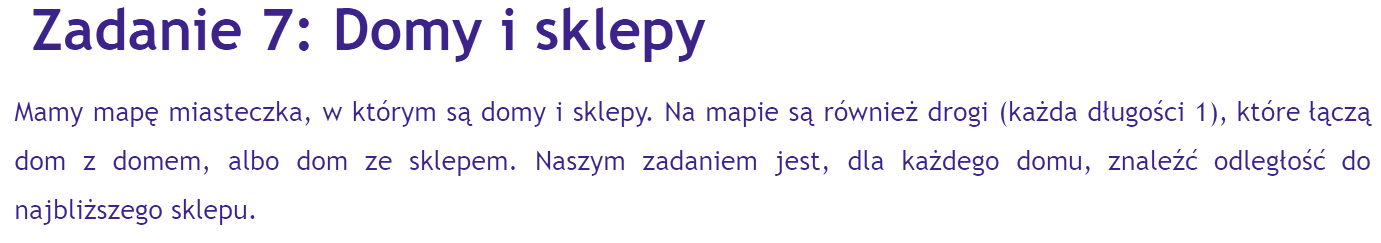

### Omówienie algorytmu

Używamy algorytmu BFS, ponieważ chcemy wyznaczyć najkrótsze ścieżki z domów do sklepów (tak naprawdę, wyznaczamy ścieżki, rozpoczynając od sklepów, ale to nie ma znaczenia, bo ścieżki prowadzą w obie strony). To, co jest BARDZO ISTOTNE, to fakt, iż musimy rozpocząć z kolejką, w której umieszczone są indeksy WSZYSTKICH SKLEPÓW. Pozwoli nam to znacznie skrócić czas działania algorytmu, ponieważ każdy wierzchołek grafu odwiedzimy dokładnie jeden raz (jeżeli graf jest spójny, a jeżeli nie, to i tak nie ma ścieżki ze sklepu do domu, bo nie została znaleziona). Jeżeli byśmy zaczęli w losowym miejscu, lub osobno dla każdego sklepu, musielibyśmy za każdym razem przejść przez cały graf i zapisywać minimalną ścieżkę z każdej iteracji dla danego domu. Dużo łatwiej jest po prostu wrzucić wszystkie sklepy do kolejki i zaznaczyć odpowiadające im wierzchołki jako odwiedzone, przez co nasz algorytm będzie rozchodził się równomiernie od każego sklepu i zawsze wyznaczy najkrótszą ścieżkę dla każdego z budynków. Działanie takiego algorytmu można porównać do wrzucenia kilku kamieni do wody w różnych miejscach. W każdym miejscu powstaną jakieś fale, które równomiernie i jednocześnie z każdego miejsca będą rozchodziły się na boki.

### Złożoność

Identyczna do BFS (dla grafu reprezentowanego, przy pomocy listy sąsiedztwa).
###### Obliczeniowa:
$ O(V + E) $, gdzie $ V $ - liczba wierzchołków, $ E $ - liczba krawędzi,
###### Pamięciowa:
$ O(V) $, gdzie $ V $ - liczba wierzchołków (zakładam, że graf w postaci list sąsiedztwa jest dany i nie wliczam go do złożoności)

### Implementacja

In [1]:
from queue import Queue


def shortest_way_to_shop(G: 'graph representing connections between shops and houses', 
                         shops: 'array of shops vertices indices'):
    n = len(G)
    visited = [False] * n
    result = [float('inf')] * n  # Infinity means no path
    q = Queue()
    for shop in shops:
        visited[shop] = True
        result[shop] = 0
        q.put(shop)
                  
    while not q.empty():
        i = q.get()
        for j in G[i]:
            if not visited[j]:
                result[j] = result[i] + 1
                visited[j] = True
                q.put(j)
    return result


def undirected_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G

###### Kilka testów

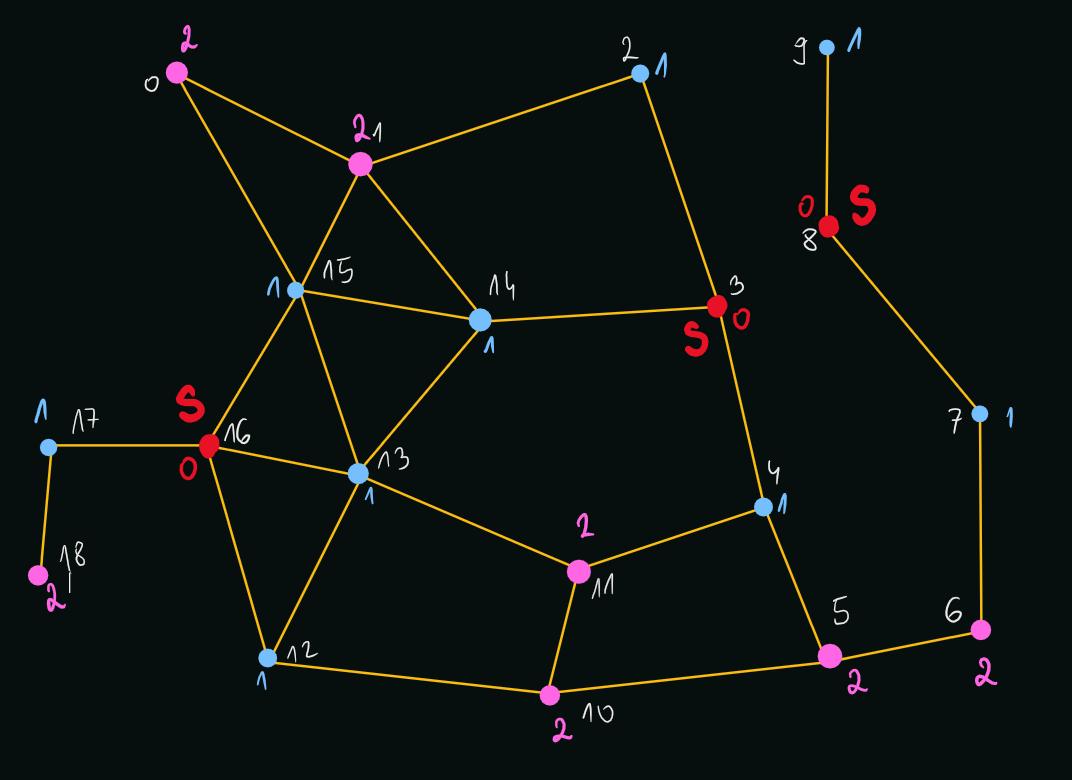

In [2]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (0, 15), (1, 15),
     (1, 14), (15, 14), (14, 3), (15, 13), (13, 14), (16, 15), (16, 13), (18, 17), (17, 16),
     (16, 12), (12, 13), (13, 11), (11, 10), (12, 10), (10, 5), (11, 4)]
shops = [16, 3, 8]

G = undirected_graph_list(E, 19)
print(*G, sep='\n', end='\n\n')

result = shortest_way_to_shop(G, shops)
for i in range(19):
    print('House: ', i, 'closest shop distance:', result[i] if result[i] != 0 else 'it\'s a shop')

[1, 15]
[0, 2, 15, 14]
[1, 3]
[2, 4, 14]
[3, 5, 11]
[4, 6, 10]
[5, 7]
[6, 8]
[7, 9]
[8]
[11, 12, 5]
[13, 10, 4]
[16, 13, 10]
[15, 14, 16, 12, 11]
[1, 15, 3, 13]
[0, 1, 14, 13, 16]
[15, 13, 17, 12]
[18, 16]
[17]

House:  0 closest shop distance: 2
House:  1 closest shop distance: 2
House:  2 closest shop distance: 1
House:  3 closest shop distance: it's a shop
House:  4 closest shop distance: 1
House:  5 closest shop distance: 2
House:  6 closest shop distance: 2
House:  7 closest shop distance: 1
House:  8 closest shop distance: it's a shop
House:  9 closest shop distance: 1
House:  10 closest shop distance: 2
House:  11 closest shop distance: 2
House:  12 closest shop distance: 1
House:  13 closest shop distance: 1
House:  14 closest shop distance: 1
House:  15 closest shop distance: 1
House:  16 closest shop distance: it's a shop
House:  17 closest shop distance: 1
House:  18 closest shop distance: 2


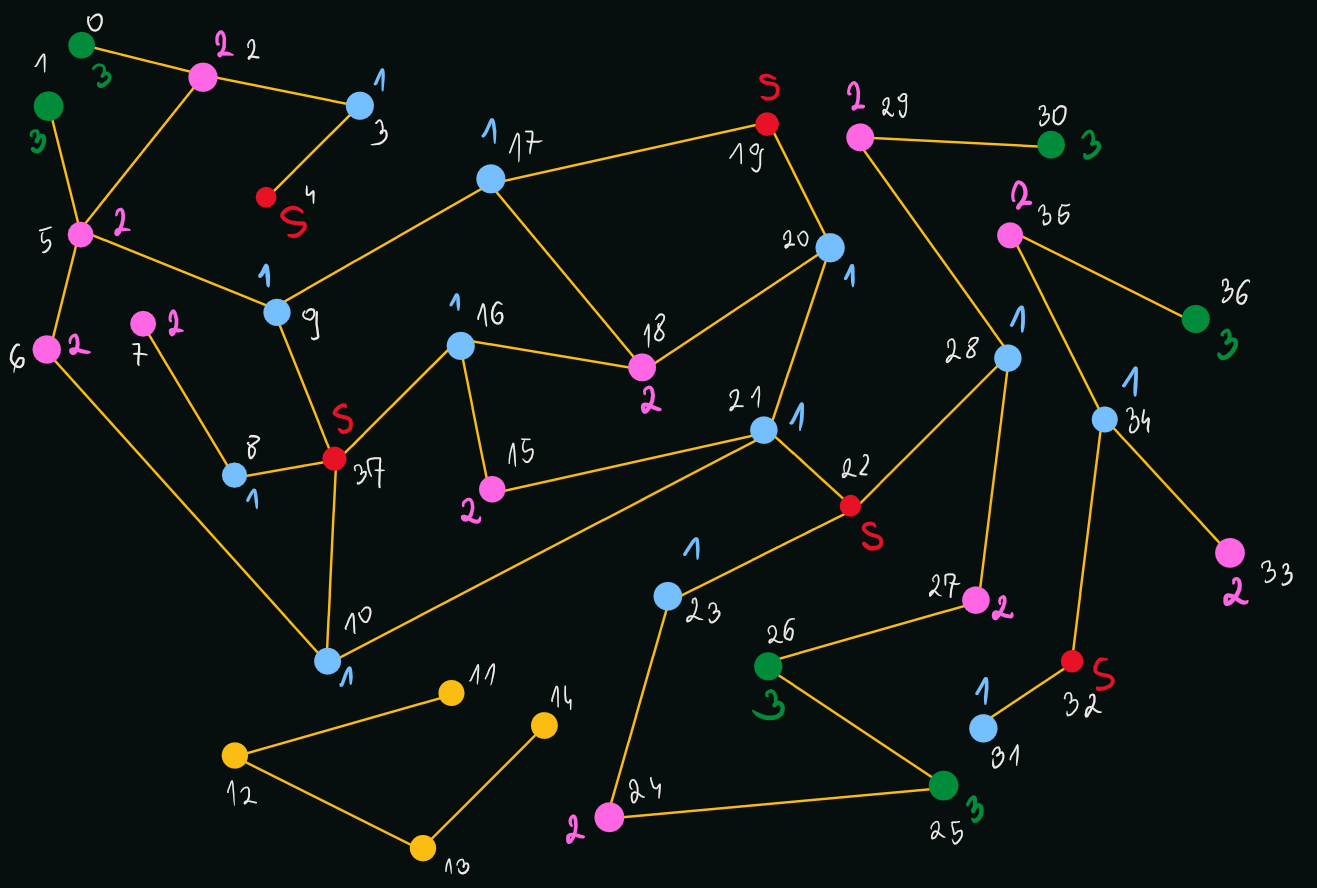

In [3]:
E = [(0, 2), (2, 3), (3, 4), (1, 5), (2, 5), (5, 6), (5, 9), (6, 10), (10, 37), (8, 37), (7, 8),
     (9, 17), (17, 19), (19, 20), (20, 18), (17, 18), (18, 16), (37, 16), (10, 21), (21, 15),
     (15, 16), (21, 20), (21, 22), (22, 28), (28, 29), (29, 30), (23, 22), (23, 24), (24, 25),
     (25, 26), (26, 27), (27, 28), (11, 12), (12, 13), (13, 14), (31, 32), (32, 34), (34, 33),
     (34, 35), (35, 36), (9, 37)]
shops = [4, 37, 19, 22, 32]

G = undirected_graph_list(E, 38)
print(*G, sep='\n', end='\n\n')

result = shortest_way_to_shop(G, shops)
for i in range(38):
    print('House: ', i, 'closest shop distance:', result[i] if result[i] != 0 else 'it\'s a shop')

[2]
[5]
[0, 3, 5]
[2, 4]
[3]
[1, 2, 6, 9]
[5, 10]
[8]
[37, 7]
[5, 17, 37]
[6, 37, 21]
[12]
[11, 13]
[12, 14]
[13]
[21, 16]
[18, 37, 15]
[9, 19, 18]
[20, 17, 16]
[17, 20]
[19, 18, 21]
[10, 15, 20, 22]
[21, 28, 23]
[22, 24]
[23, 25]
[24, 26]
[25, 27]
[26, 28]
[22, 29, 27]
[28, 30]
[29]
[32]
[31, 34]
[34]
[32, 33, 35]
[34, 36]
[35]
[10, 8, 16, 9]

House:  0 closest shop distance: 3
House:  1 closest shop distance: 3
House:  2 closest shop distance: 2
House:  3 closest shop distance: 1
House:  4 closest shop distance: it's a shop
House:  5 closest shop distance: 2
House:  6 closest shop distance: 2
House:  7 closest shop distance: 2
House:  8 closest shop distance: 1
House:  9 closest shop distance: 1
House:  10 closest shop distance: 1
House:  11 closest shop distance: inf
House:  12 closest shop distance: inf
House:  13 closest shop distance: inf
House:  14 closest shop distance: inf
House:  15 closest shop distance: 2
House:  16 closest shop distance: 1
House:  17 closest shop distance: